                    Part A: Data Preprocessing Tasks

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

                                  DATA INSPECTION

In [65]:
df=pd.read_csv("C:/Users/JHANANISHRI/Downloads/Retail_Transactions_2000.csv")

In [66]:
df.size

22000

In [67]:
df.shape

(2000, 11)

In [68]:
df.columns.tolist()

['TransactionID',
 'CustomerID',
 'Gender',
 'Age',
 'City',
 'ProductCategory',
 'Quantity',
 'Price',
 'PurchaseDate',
 'PaymentMode',
 'TotalAmount']

In [69]:
df.isnull()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,False


In [70]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

                               2. Handling Missing Data

In [71]:
df['Age'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: Age, Length: 2000, dtype: bool

In [72]:
df['City'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: City, Length: 2000, dtype: bool

In [73]:
df['TransactionID'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: TransactionID, Length: 2000, dtype: bool

In [74]:
df['ProductCategory'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: ProductCategory, Length: 2000, dtype: bool

                                       3. Data Cleaning

In [75]:
df['Gender'] = (df['Gender'].str.strip().str.upper().replace({'MALE': 'M', 'M': 'M',
        'FEMALE': 'F', 'F': 'F',
        'OTHER': 'O', 'O': 'O'}))
print(df['Gender'])

0       F
1       O
2       O
3       O
4       F
       ..
1995    M
1996    M
1997    M
1998    M
1999    M
Name: Gender, Length: 2000, dtype: object


In [77]:
df = df[(df["Quantity"] > 0) & (df["Price"] > 0)]
print(df)

     TransactionID CustomerID Gender  Age       City ProductCategory  \
0           T00001      C2824      F   33  Bengaluru         Fashion   
1           T00002      C1409      O   20       Pune           Books   
2           T00003      C5506      O   47       Pune       Furniture   
3           T00004      C5012      O   21  Hyderabad       Groceries   
4           T00005      C4657      F   41    Chennai          Sports   
...            ...        ...    ...  ...        ...             ...   
1995        T01996      C1151      M   44     Jaipur         Fashion   
1996        T01997      C5888      M   53  Ahmedabad          Beauty   
1997        T01998      C2758      M   45    Lucknow     Electronics   
1998        T01999      C6489      M   43  Bengaluru          Sports   
1999        T02000      C5662      M   33  Hyderabad          Beauty   

      Quantity  Price PurchaseDate PaymentMode  TotalAmount  
0            3   4479   2023-03-15        Cash        13437  
1          

                         4. Feature Engineering

In [78]:
df['TotalAmount'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: TotalAmount, Length: 2000, dtype: bool

In [79]:
df['TotalAmount']=df['Quantity'] * df['Price']
print(df['TotalAmount'])

0       13437
1        5255
2         111
3       14730
4        3123
        ...  
1995     4872
1996     8232
1997     3246
1998     5418
1999     3122
Name: TotalAmount, Length: 2000, dtype: int64


In [86]:
df["DayOfWeek"] = df["PurchaseDate"].dt.day_name()
df["Month"] = df["PurchaseDate"].dt.month
print(df[["DayOfWeek", "Month"]].head())

   DayOfWeek  Month
0  Wednesday      3
1     Sunday      1
2    Tuesday      4
3  Wednesday      8
4   Saturday      9


In [90]:
bins = [0, 25, 40, 60, np.inf]
labels = ["18-25", "26-40", "41-60", "60+"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)
print(df["AgeGroup"])

0       26-40
1       18-25
2       41-60
3       18-25
4       41-60
        ...  
1995    41-60
1996    41-60
1997    41-60
1998    41-60
1999    26-40
Name: AgeGroup, Length: 2000, dtype: category
Categories (4, object): ['18-25' < '26-40' < '41-60' < '60+']


                         5. Encoding & Transformation

In [99]:
df_encoded = df.copy()
df_encoded["Gender"] = df_encoded["Gender"].astype("category").cat.codes
df_encoded["City"] = df_encoded["City"].astype("category").cat.codes
print(df_encoded["Gender"],df_encoded["City"])

0       0
1       2
2       2
3       2
4       0
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: Gender, Length: 2000, dtype: int8 0       1
1       9
2       9
3       4
4       2
       ..
1995    5
1996    0
1997    7
1998    1
1999    4
Name: City, Length: 2000, dtype: int8


In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encoded[["Age","Price","TotalAmount"]]=scaler.fit_transform(df_encoded[["Age","Price","TotalAmount"]])
print(df_encoded[["Age","Price","TotalAmount"]])

           Age     Price  TotalAmount
0     0.288462  0.893673     0.536495
1     0.038462  0.194082     0.207094
2     0.557692  0.002245     0.000000
3     0.057692  0.580816     0.588550
4     0.442308  0.616939     0.121261
...        ...       ...          ...
1995  0.500000  0.476735     0.191674
1996  0.673077  0.539592     0.326946
1997  0.519231  0.642041     0.126213
1998  0.480769  0.532449     0.213656
1999  0.288462  0.298163     0.121221

[2000 rows x 3 columns]


                              6. Final Verification

In [105]:
print(df.isnull().sum())

TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
DayOfWeek          0
Month              0
AgeGroup           0
dtype: int64


In [106]:
df.to_csv("Retail_Cleaned.csv", index=False)
df_encoded.to_csv("Retail_Cleaned_Encoded.csv", index=False)

✅ Data cleaning complete. Files saved: Retail_Cleaned.csv & Retail_Cleaned_Encoded.csv


In [108]:
import pandas as pd
df_test = pd.read_csv("Retail_Cleaned.csv")
print(df_test)

     TransactionID CustomerID Gender  Age       City ProductCategory  \
0           T00001      C2824      F   33  Bengaluru         Fashion   
1           T00002      C1409      O   20       Pune           Books   
2           T00003      C5506      O   47       Pune       Furniture   
3           T00004      C5012      O   21  Hyderabad       Groceries   
4           T00005      C4657      F   41    Chennai          Sports   
...            ...        ...    ...  ...        ...             ...   
1995        T01996      C1151      M   44     Jaipur         Fashion   
1996        T01997      C5888      M   53  Ahmedabad          Beauty   
1997        T01998      C2758      M   45    Lucknow     Electronics   
1998        T01999      C6489      M   43  Bengaluru          Sports   
1999        T02000      C5662      M   33  Hyderabad          Beauty   

      Quantity  Price PurchaseDate PaymentMode  TotalAmount  DayOfWeek  Month  \
0            3   4479   2023-03-15        Cash        

                        Part B: Data Visualization Tasks

                             1. Customer Demographics

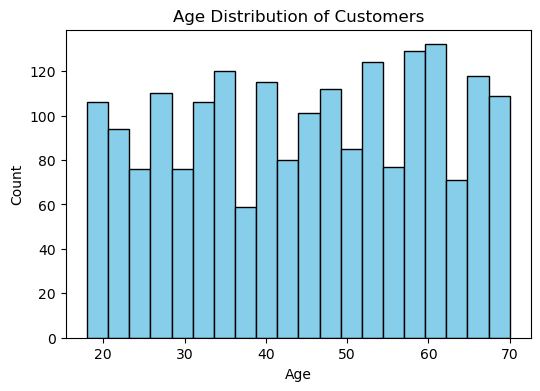

In [110]:
plt.figure(figsize=(6,4))
plt.hist(df["Age"],bins=20,color="skyblue",edgecolor="black")
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

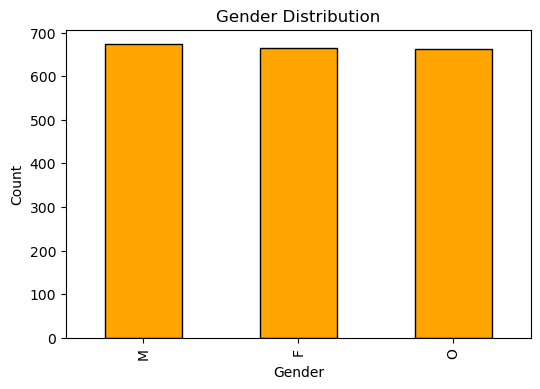

In [111]:
plt.figure(figsize=(6,4))
df["Gender"].value_counts().plot(kind="bar",color="orange",edgecolor="black")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

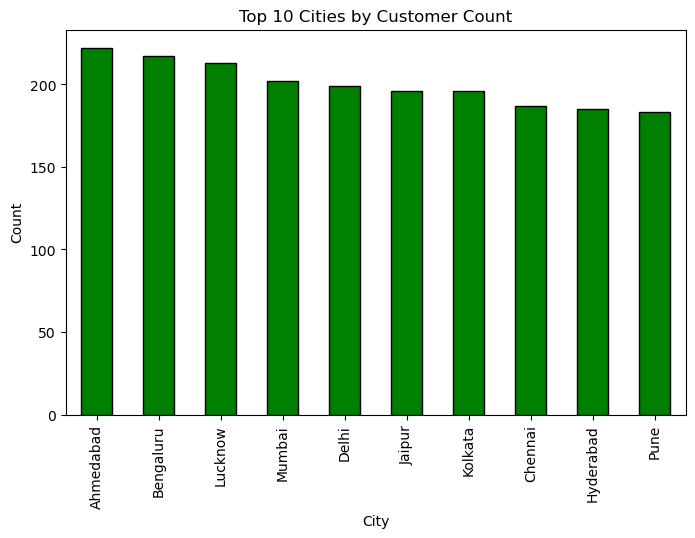

In [112]:
plt.figure(figsize=(8,5))
df["City"].value_counts().head(10).plot(kind="bar",color="green",edgecolor="black")
plt.title("Top 10 Cities by Customer Count")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

                                 2. Sales Insights

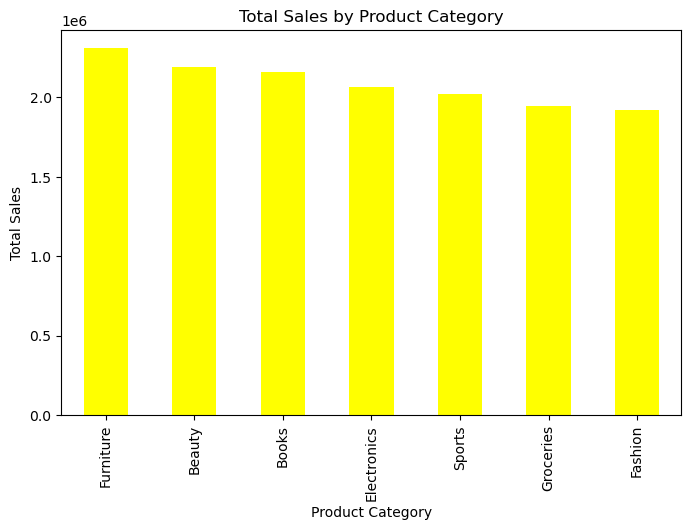

In [127]:
plt.figure(figsize=(8,5))
df.groupby("ProductCategory")["TotalAmount"].sum().sort_values(ascending=False).plot(kind="bar",color="yellow")
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.show()

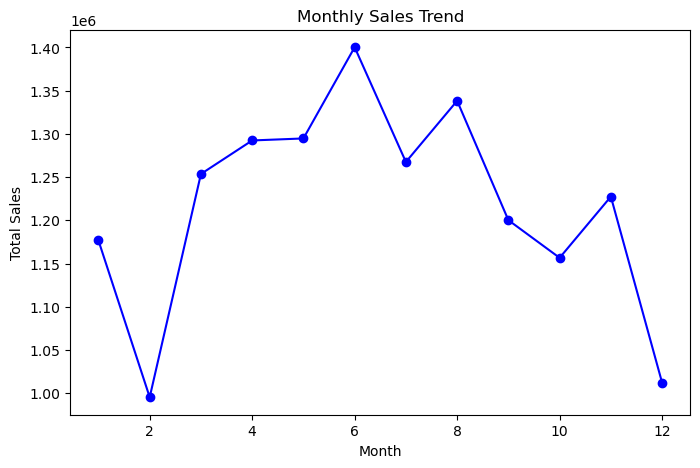

In [114]:
plt.figure(figsize=(8,5))
df.groupby("Month")["TotalAmount"].sum().plot(marker="o", linestyle="-", color="blue")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

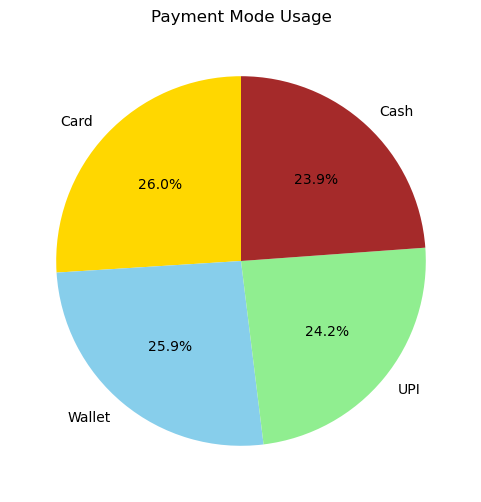

In [128]:
plt.figure(figsize=(6,6))
df["PaymentMode"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["gold","skyblue","lightgreen","brown"])
plt.title("Payment Mode Usage")
plt.ylabel("")
plt.show()

                               3. Advanced Insights

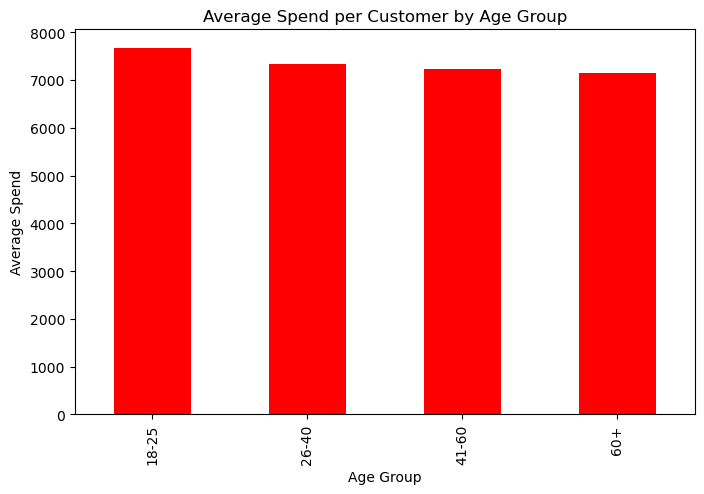

In [129]:
plt.figure(figsize=(8,5))
df.groupby("AgeGroup")["TotalAmount"].mean().plot(kind="bar",color="red")
plt.title("Average Spend per Customer by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Spend")
plt.show()

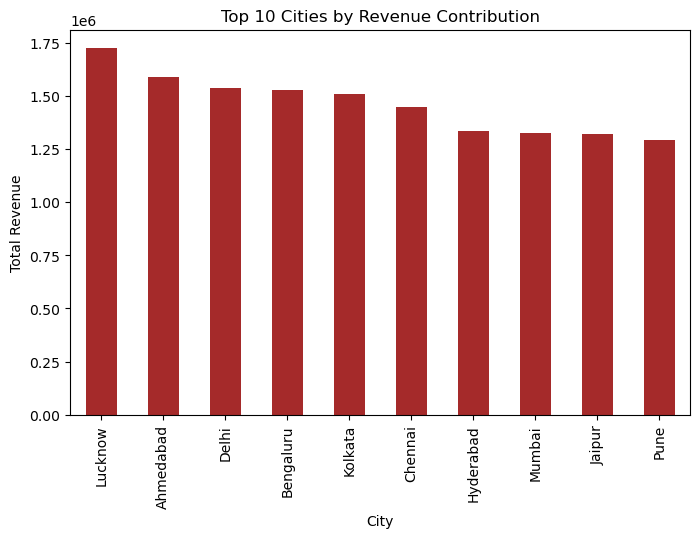

In [130]:
plt.figure(figsize=(8,5))
df.groupby("City")["TotalAmount"].sum().sort_values(ascending=False).head(10).plot(kind="bar",color="brown")
plt.title("Top 10 Cities by Revenue Contribution")
plt.xlabel("City")
plt.ylabel("Total Revenue")
plt.show()

Text(0.5, 1.0, 'Product Category vs Payment Mode (Total Sales)')

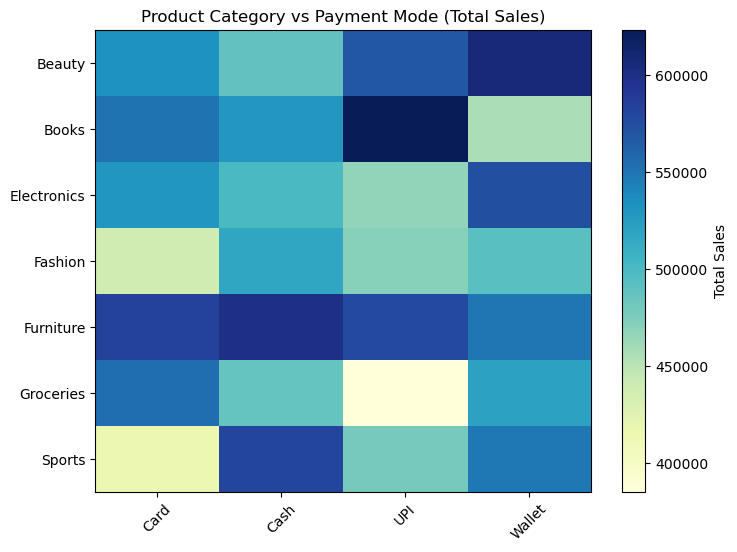

In [124]:
pivot_table = df.pivot_table(values="TotalAmount", index="ProductCategory", columns="PaymentMode", aggfunc="sum", fill_value=0)
plt.figure(figsize=(8,6))
plt.imshow(pivot_table, cmap="YlGnBu", aspect="auto")
plt.colorbar(label="Total Sales")
plt.xticks(ticks=np.arange(len(pivot_table.columns)), labels=pivot_table.columns, rotation=45)
plt.yticks(ticks=np.arange(len(pivot_table.index)), labels=pivot_table.index)
plt.title("Product Category vs Payment Mode (Total Sales)")